# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [4]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline # inline 환경에서 맷플롯립 사용하겠다 선언

UsageError: unrecognized arguments: # inline 환경에서 맷플롯립 사용하겠다 선언


In [5]:
## 동일 경로에 train.csv가 있다면:
## 데이터 불러오기

titanic_df=pd.read_csv("./train.csv")

## 1. 분석의 목적과 변수 확인

- 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?

In [4]:
## 상위 5개의 데이터 확인
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 2. 데이터 전체적으로 살펴보기

In [6]:
## 데이터 전체 정보를 얻는 함수: .describe()

titanic_df.describe()  # 수치형 데이터에 대한 요약만을 제공

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
## 상관계수 확인!

titanic_df.corr()
# Correlation is NOT Causation 상관성과 인과성은 구별해야 한다.
# 상관성: A up, B up, ...
# 인과성: A->B
# 그럼 상관계수로부터 인과관계의 강도를 추론해낼 수 있는가?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
## 결측치 확인
## 어떤 변수에 null이 들어있나?
## 그 null이 들어있는 개체의 수를 알고 싶다면 sum() 이용
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### 1. Survived Column

In [5]:
## 생존자, 사망자 명수는? >>> sum(수치의 합을 알려준다), value_counts

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

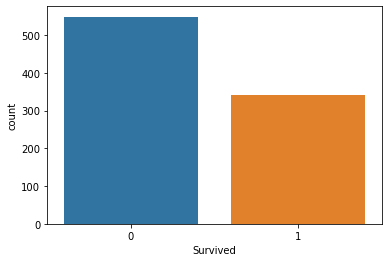

In [15]:
## 생존자수와 사망자수를 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data=titanic_df) # 카테고리별로 count해 결과를 plotting 해달라.
plt.show()
## 생존자와 사망자 비교를 시각적으로 한눈에 할 수 있음

### 2. Pclass

In [8]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass','Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [11]:
# 생존자 인원?

titanic_df[['Pclass','Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [12]:
# 생존 비율 (Survived/Pclass)

titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:ylabel='Pclass'>

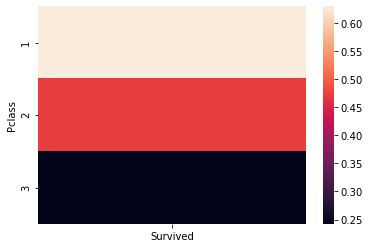

In [13]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean())

### 3. Sex

In [10]:
titanic_df[['Sex','Survived']]

# 성별별 survived 비율 알고 싶으면?

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [15]:
titanic_df.groupby(['Survived','Sex'])['Survived'].count()  # Survived column에 대해 성별별로 수를 count 해주고자 할 때.

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

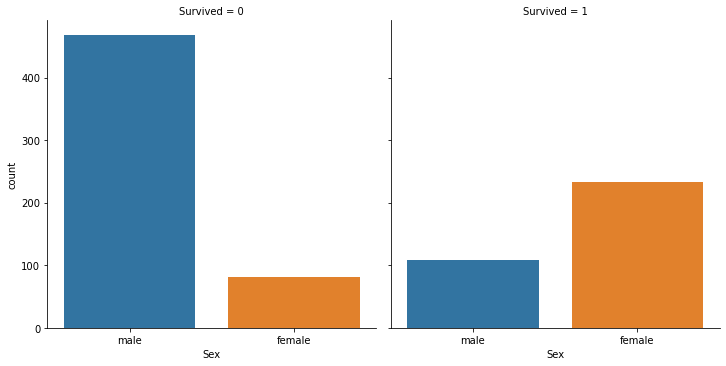

In [16]:
# sns.catplot

sns.catplot(x='Sex',col='Survived', kind='count',data=titanic_df)

### 4. Age

- Remind: 결측치 존재!

In [17]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

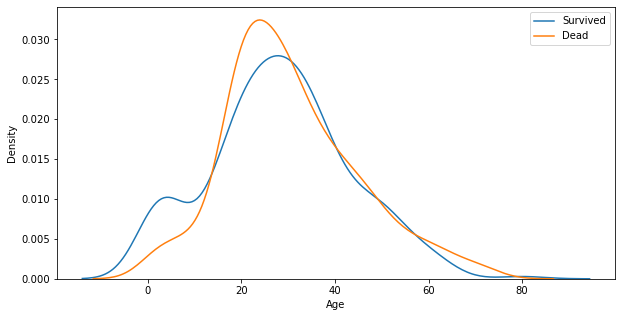

In [19]:
## Survived 1, 0과 Age의 경향성

# figure -> axis -> plot
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived==1]['Age'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'],ax=ax)

# 범례 그려주기: Survived와 Dead에 대한..
plt.legend(['Survived','Dead'])
plt.show()

### Appendix 1. Sex+Pclass vs Survived

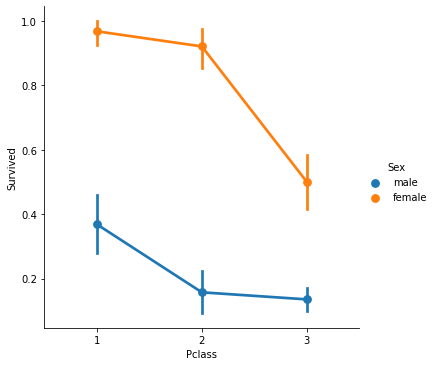

In [22]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='point',data=titanic_df)
# hue는 그래프 좌표축 외의 소그룹
plt.show()

### Appendix 2. Age+Pclass

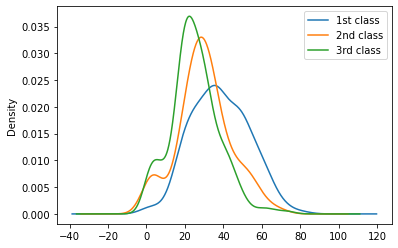

In [26]:
### Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass==1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==3].plot(kind='kde')

plt.legend(['1st class','2nd class','3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### Hint
1. 데이터를 톺아보자
- 각 데이터는 어떤 자료형을 가지고 있나요?
- 데이터에 **결측치**는 없나요? 있다면 어떻게 메꿔줄까요?
- 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워보자
- 가설은 개인의 경험에 의해 도출되어도 상관없다.
- 가설은 명확할수록 좋다. ex) Titanic Data에서 Survival 여부와 성별에는 3. 상관관계가 있다.
- 가설을 검증하기 위한 증거를 찾아보자.
- 이 증거는 한 눈에 보이지 않을 수 있다. 우리가 다룬 여러 technique를 써줘야 한다.
- `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까?
- `.merge()`를 통해서 두 개 이상의 dataFrame을 합치면 어떨까?
- 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

In [4]:
# 1. 'SibSp' 속성과 'Survived' 간의 관계는?
# 가설: 'SibSp'가 낮을수록 생존률이 낮을 듯.
titanic_df[['SibSp','Survived']].groupby('SibSp').count()

,Survived
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [7]:
titanic_df[['SibSp','Survived']].groupby('SibSp').sum()

,Survived
SibSp,
0,210
1,112
2,13
3,4
4,3
5,0
8,0


In [6]:
titanic_df[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot:ylabel='SibSp'>

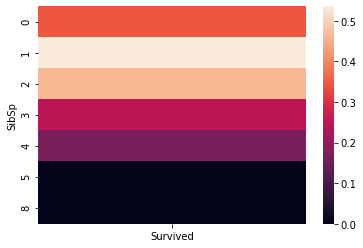

In [19]:
# sns.heatmap(titanic_df[['SibSp','Survived']].groupby(['SibSp'])) >> 오류 발생: 'heatmap의 인자를 sequence로 전달해 주세요'
sns.heatmap(titanic_df[['SibSp','Survived']].groupby(['SibSp']).mean())

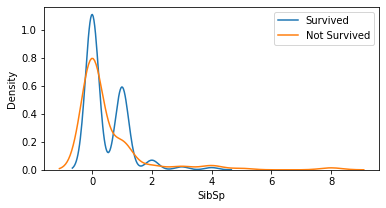

In [22]:
# catplot, kdeplot >> sns (seaborn)
fig,ax= plt.subplots(1,1,figsize=(6,3))
sns.kdeplot(x=titanic_df[titanic_df['Survived']==1]['SibSp'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df['Survived']==0]['SibSp'],ax=ax)

plt.legend(['Survived','Not Survived'])
plt.show()

>> 형제자매나 배우자가 1~2명인 사람의 생존비율이 제일 높았다. 형제자매&배우자의 수에 따른 생존률의 상관관계를 명확히 밝힐 순 없으나, 형제자매가 없거나 매우 많으면 생존률이 낮다.

In [29]:
# 2. 'ParCh' 속성과 'Survived' 간의 관계는?
# 가설: 'ParCh'가 낮을수록 생존률이 낮을 듯.
titanic_df[['Parch','Survived']].groupby('Parch').count()

,Survived
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


In [30]:
titanic_df[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


<AxesSubplot:ylabel='Parch'>

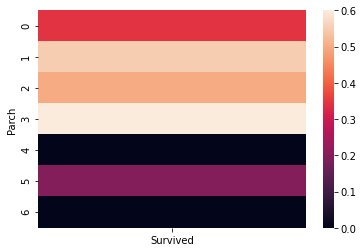

In [33]:
sns.heatmap(titanic_df[['Parch','Survived']].groupby(['Parch']).mean())

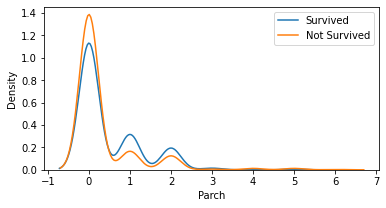

In [34]:
fig,ax= plt.subplots(1,1,figsize=(6,3))
sns.kdeplot(x=titanic_df[titanic_df['Survived']==1]['Parch'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df['Survived']==0]['Parch'],ax=ax)

plt.legend(['Survived','Not Survived'])
plt.show()

>> 부모 혹은 자녀의 수가 1~3명이면 생존 가능성이 사망 가능성보다 높으며 부모 혹은 자녀가 없거나 많으면 생존 가능성이 낮았다.

In [35]:
# 3. 'Fare' 속성과 'Survived' 간의 관계는?
# 가설: 'Fare'가 높을수록 생존률이 높을 듯.
titanic_df[['Fare','Survived']].groupby('Fare').count()

,Survived
Fare,
0.0000,15
4.0125,1
5.0000,1
6.2375,1
6.4375,1
...,...
227.5250,4
247.5208,2
262.3750,2


In [37]:
titanic_df[['Fare','Survived']].groupby('Fare').sum()

,Survived
Fare,
0.0000,1
4.0125,0
5.0000,0
6.2375,0
6.4375,0
...,...
227.5250,3
247.5208,1
262.3750,2


In [38]:
titanic_df[['Fare','Survived']].groupby('Fare').mean()

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


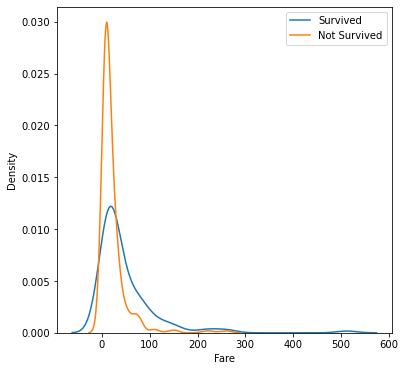

In [44]:
fig,ax= plt.subplots(1,1,figsize=(6,6))
sns.kdeplot(x=titanic_df[titanic_df['Survived']==1]['Fare'],ax=ax)
sns.kdeplot(x=titanic_df[titanic_df['Survived']==0]['Fare'],ax=ax)

plt.legend(['Survived','Not Survived'])
plt.show()

>> 더 많은 요금을 내고 이용하는 승객이 상대적으로 훨씬 더 많이 생존하였다.

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 documents
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()